<a href="https://colab.research.google.com/github/akulkarni14/AAI-praticals/blob/main/P9_FasterVisuaEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving dog.jpg to dog (1).jpg


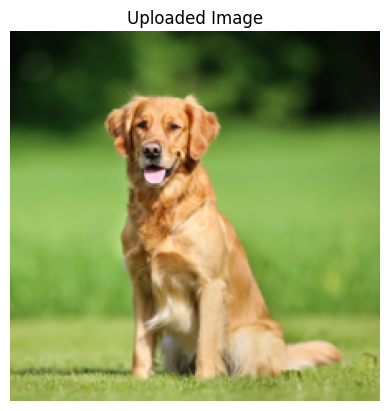

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


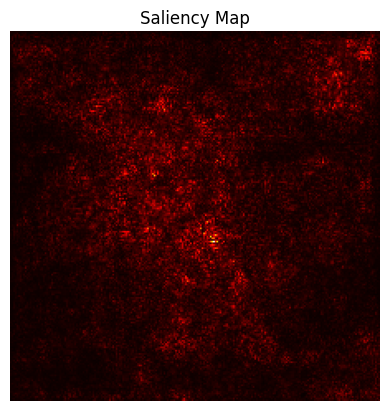

  0%|          | 0/300 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

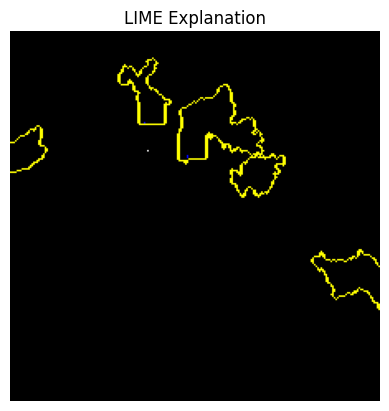

In [2]:
# Install LIME
!pip install lime --quiet

# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries
from google.colab import files
from PIL import Image
import io

# Upload image
uploaded = files.upload()
for fname in uploaded.keys():
    # Load and preprocess image
    img = Image.open(io.BytesIO(uploaded[fname])).convert('RGB').resize((224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)

    # Display image
    plt.imshow(img)
    plt.axis('off')
    plt.title("Uploaded Image")
    plt.show()

    # Load model
    model = MobileNetV2(weights='imagenet')

    # --- Saliency Map ---
    img_tensor = tf.convert_to_tensor(img_preprocessed)
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        top_class = tf.argmax(predictions[0])
        top_class_score = predictions[:, top_class]
    grads = tape.gradient(top_class_score, img_tensor)
    saliency = tf.reduce_max(tf.abs(grads), axis=-1)[0]
    plt.imshow(saliency, cmap='hot')
    plt.axis('off')
    plt.title("Saliency Map")
    plt.show()

    # --- LIME Explanation (Fast) ---
    def predict_fn(images):
        return model.predict(preprocess_input(images))

    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(
        np.uint8(img_array),
        predict_fn,
        top_labels=5,
        hide_color=0,
        num_samples=300  # reduced for speed
    )
    lime_img, mask = explanation.get_image_and_mask(
        label=explanation.top_labels[0],
        positive_only=True,
        hide_rest=False
    )
    plt.imshow(mark_boundaries(lime_img / 255.0, mask))
    plt.axis('off')
    plt.title("LIME Explanation")
    plt.show()
